In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("../../")
from src.soporte_metricas import (
    obtener_metricas,
    residual_plot,
    generar_df_comparador
)
pd.options.display.float_format = "{:,.2f}".format

In [5]:
df = pd.read_csv("../../datos/06_rent_outliers_gestionados.csv")

# Gradient Boosting
- Vamos a probar los datos en este modelo para ver si obtenemos mejores resultados

In [6]:
X = df.drop(columns="price")
y = df[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, # Todo menos la Variable Respuesta
                                                    y, # La variable Respuesta
                                                    train_size=0.7, # Como dividir los datos en este caso 80% train, 20% test
                                                    random_state=42, # Semilla, para que lo haga igual para cualquier persona
                                                    shuffle=True 
                                                    )

In [7]:
modelo_arbol = GradientBoostingRegressor()
modelo_arbol.fit(X_train,y_train)
y_pred_test = modelo_arbol.predict(X_test)
y_pred_train = modelo_arbol.predict(X_train)
df_metricas = obtener_metricas(y_train,y_pred_train,y_test,y_pred_test)
df_metricas

,r2_score,MAE,MSE,RMSE
train,0.93,14.21,404.41,20.11
test,0.69,33.22,"2,312.97",48.09


# Vemos una posible Mejoría
- Vamos a darle parámetros

In [8]:
# Parámetros a evaluar
params_gb = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                                 param_grid= params_gb,
                                 cv = 5, # Cross Validation de 5 grupos solo
                                 scoring="neg_mean_squared_error",
                                 n_jobs=-1)


grid_search_gb.fit(X_train, y_train.to_numpy().ravel())
modelo_final_gb = grid_search_gb.best_estimator_


In [9]:
y_pred_test_gb = modelo_final_gb.predict(X_test)
y_pred_train_gb = modelo_final_gb.predict(X_train)

resultados_gb= obtener_metricas(y_train,y_pred_train,y_test,y_pred_test)
resultados_gb

,r2_score,MAE,MSE,RMSE
train,0.93,14.21,404.41,20.11
test,0.69,33.22,"2,312.97",48.09


In [10]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=4, n_estimators=50, random_state=42)

# Try 2

In [11]:
# Parámetros a evaluar
params_gb = {
    'n_estimators': [10,20,30,40,50,100,150],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4,5,8,10,12,15]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                                 param_grid= params_gb,
                                 cv = 5, # Cross Validation de 5 grupos solo
                                 scoring="neg_mean_squared_error",
                                 n_jobs=-1)


grid_search_gb.fit(X_train, y_train.to_numpy().ravel())
modelo_final_gb = grid_search_gb.best_estimator_


In [ ]:
y_pred_test_gb = modelo_final_gb.predict(X_test)
y_pred_train_gb = modelo_final_gb.predict(X_train)

resultados_gb= obtener_metricas(y_train,y_pred_train,y_test,y_pred_test)
resultados_gb

,r2_score,MAE,MSE,RMSE
train,0.93,14.21,404.41,20.11
test,0.69,33.22,"2,312.97",48.09


In [13]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=15, n_estimators=50, random_state=42)

# Try 3

In [14]:
# Parámetros a evaluar
params_gb = {
    'n_estimators': [40,43,45,50,53,55],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [10,12,15,20,22,25]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                                 param_grid= params_gb,
                                 cv = 5, # Cross Validation de 5 grupos solo
                                 scoring="neg_mean_squared_error",
                                 n_jobs=-1)


grid_search_gb.fit(X_train, y_train.to_numpy().ravel())
modelo_final_gb = grid_search_gb.best_estimator_


In [15]:
y_pred_test_gb = modelo_final_gb.predict(X_test)
y_pred_train_gb = modelo_final_gb.predict(X_train)

resultados_gb= obtener_metricas(y_train,y_pred_train,y_test,y_pred_test)
resultados_gb

,r2_score,MAE,MSE,RMSE
train,0.93,14.21,404.41,20.11
test,0.69,33.22,"2,312.97",48.09


In [16]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=15, n_estimators=50, random_state=42)

# Try 4

In [17]:
# Parámetros a evaluar
params_gb = {
    'n_estimators': [44,45,50,51,52,53,54],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [13,14,15,16,17,18,19,20]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                                 param_grid= params_gb,
                                 cv = 5, # Cross Validation de 5 grupos solo
                                 scoring="neg_mean_squared_error",
                                 n_jobs=-1)


grid_search_gb.fit(X_train, y_train.to_numpy().ravel())
modelo_final_gb = grid_search_gb.best_estimator_


In [18]:
y_pred_test_gb = modelo_final_gb.predict(X_test)
y_pred_train_gb = modelo_final_gb.predict(X_train)

resultados_gb= obtener_metricas(y_train,y_pred_train,y_test,y_pred_test)
resultados_gb

,r2_score,MAE,MSE,RMSE
train,0.93,14.21,404.41,20.11
test,0.69,33.22,"2,312.97",48.09


In [19]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=15, n_estimators=50, random_state=42)

# Pasamos los resultados a un DF

In [20]:
# Resultados del GridSearchCV
resultados_gb = pd.DataFrame(grid_search_gb.cv_results_)

# Extraemos el impacto de los parámetros

In [21]:
# Extraer el impacto de cada parámetro principal
impacto_gb = resultados_gb[['param_n_estimators', 'param_learning_rate', 
                            'param_max_depth', 'param_min_samples_split', 
                            'param_min_samples_leaf', 'mean_test_score']]
impacto_gb['mean_test_score'] = -impacto_gb['mean_test_score']  # Convertir a MSE positivo

# Visualizamos el impacto de cada parámetro

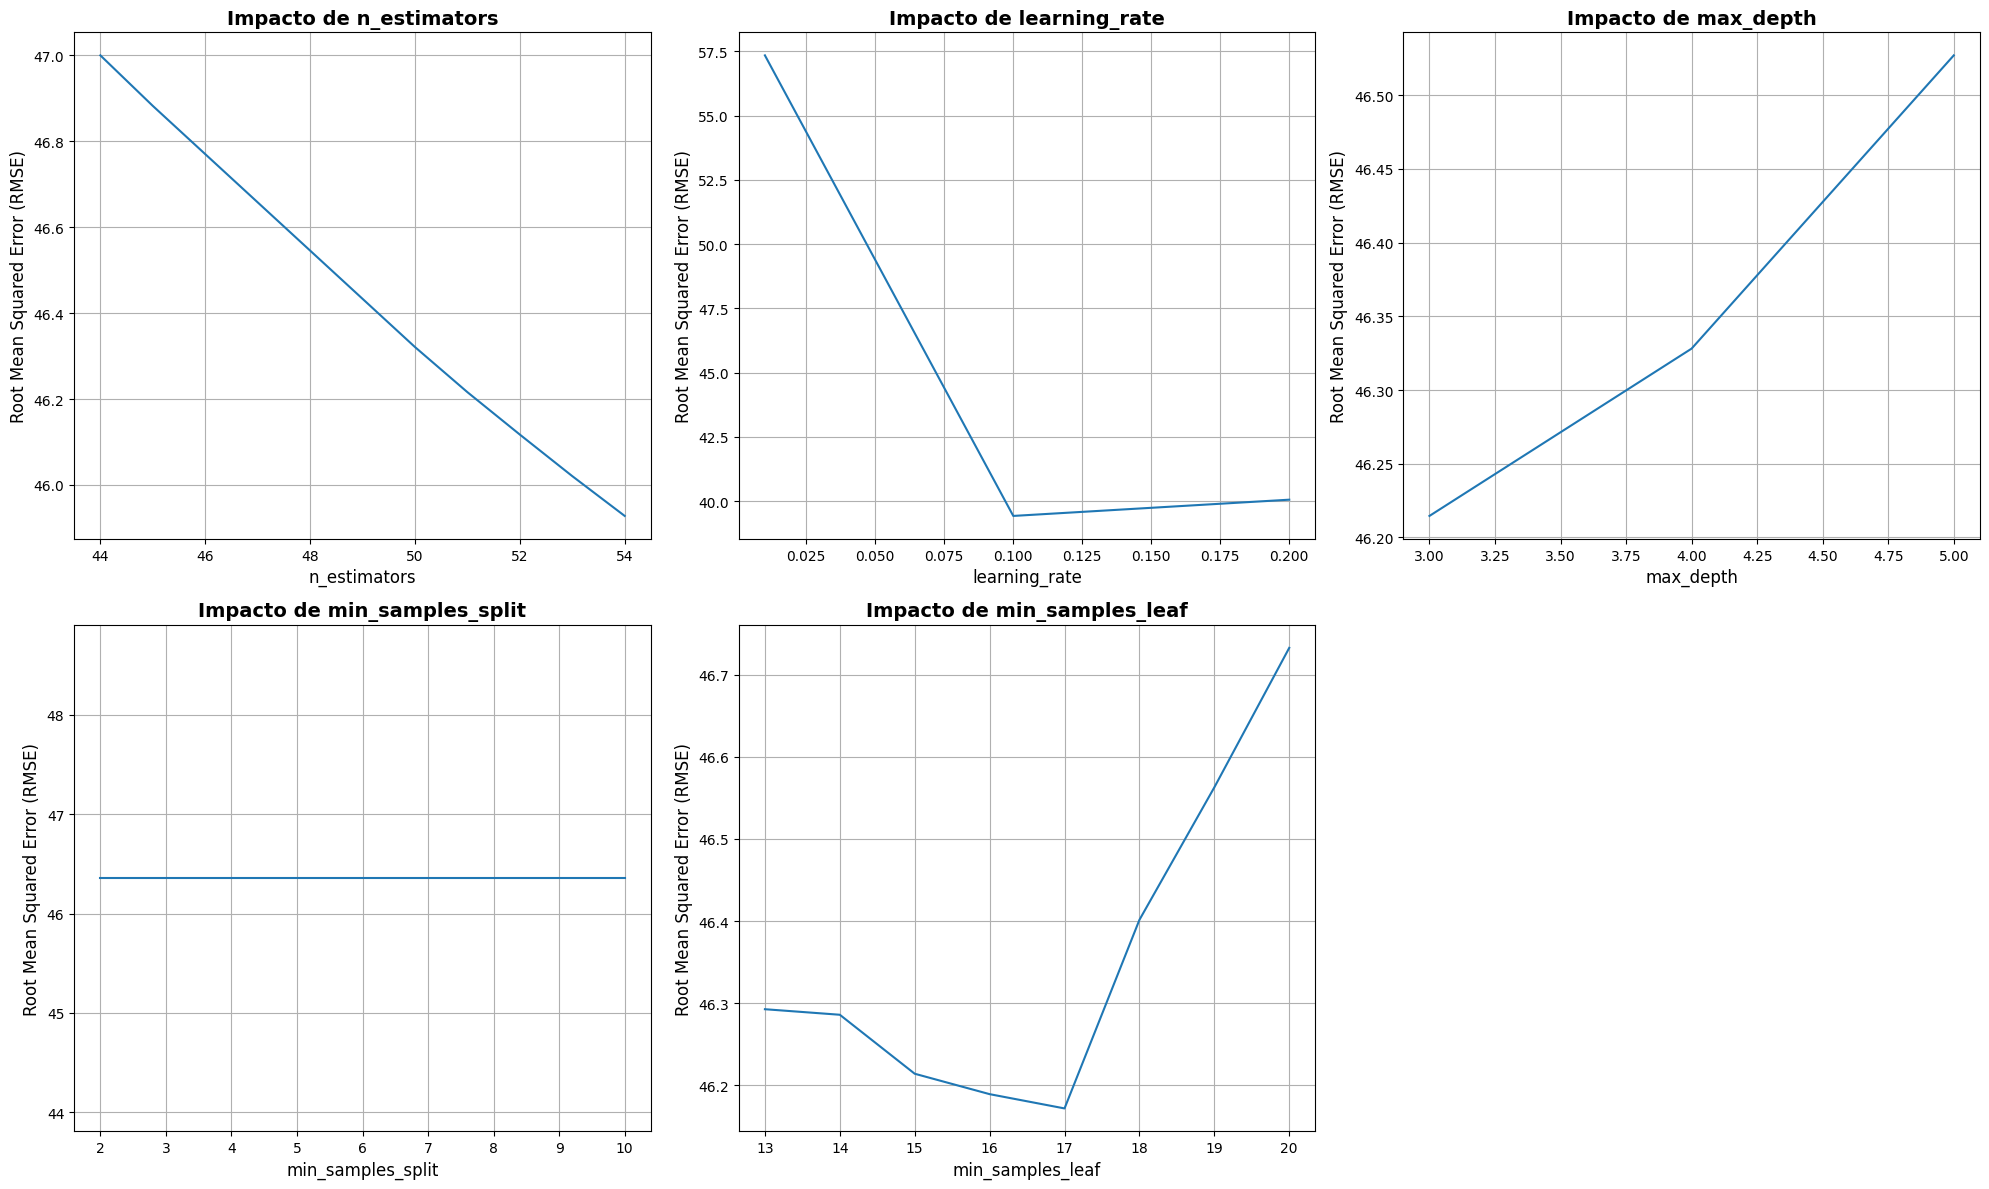

In [22]:
# Visualización del impacto de cada parámetro
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flat
parametros_gb = impacto_gb.columns[:-1]
titulos_gb = ['Impacto de n_estimators', 'Impacto de learning_rate',
              'Impacto de max_depth', 'Impacto de min_samples_split',
              'Impacto de min_samples_leaf']

for indice, columns in enumerate(parametros_gb):
    df_resultados_gb = impacto_gb.groupby(columns)['mean_test_score'].mean().reset_index()
    df_resultados_gb['sqrt_mean_test_score'] = np.sqrt(df_resultados_gb['mean_test_score'])
    sns.lineplot(x=columns, y="sqrt_mean_test_score", data=df_resultados_gb, ax=axs[indice])
    axs[indice].set_title(titulos_gb[indice], fontsize=14, fontweight='bold')
    axs[indice].set_xlabel(columns.replace('param_', ''), fontsize=12)
    axs[indice].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=12)
    axs[indice].grid(True)

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

In [23]:
# Imprimir el mejor modelo
print("Mejor modelo encontrado para Gradient Boosting:")
print(modelo_final_gb)

Mejor modelo encontrado para Gradient Boosting:
GradientBoostingRegressor(min_samples_leaf=15, n_estimators=50, random_state=42)
